In [161]:
## Exercicio de LAB 06 Curso Banco de Dados - FATEC SJC

## Importando biblioteca Pandas
import pandas as pd

# Define o tipo para a coluna diagnosis
DTYPES = {'App': str}

## Importando arquivo salvo no github para analise
url = 'https://raw.githubusercontent.com/MaXximiles/LAB06/main/EXEC%2001/content/water_potability.csv'

## Lendo os dados separados por virgula
wbc= pd.read_csv(url, sep=',', header=0, dtype = DTYPES)

## Exibindo primeiros 5 registros
wbc.head(25)

## Vendo informações da base de dados
wbc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [162]:
## Limpando Dados nulos
wbc.dropna(inplace=True)

## Exibindo primeiros 25 registros
wbc.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [163]:
## Variavel Alvo e Dados
y = wbc['Potability']
x = wbc.drop(['Potability'], axis = 1) ## Armazenando tabela sem coluna Potability

x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [175]:
## Importando bilioteca para corte de dados e teste
from sklearn.model_selection import train_test_split

## Sintaxe train_test_split(Dados(planilha), coluna(alvo) test_size = porcentagem de dados para o teste)
## Divide em x teste e treino e y teste e treino
xTreino, xTeste, yTreino, yTeste = train_test_split(x,y,test_size = 0.7)

In [176]:
## Treinando os Dados: DecisionTreeClassifier(Arvore de Decisão)
from sklearn.tree import DecisionTreeClassifier

## Criação da arvore: 
modelo = DecisionTreeClassifier(max_depth=4, random_state=20)

## Treino da arvore
modelo.fit(xTreino, yTreino)

## Mostrando resultado do treino
resultado = modelo.score(xTeste, yTeste)
print("Acuracia: ", resultado)

Acuracia:  0.6107954545454546


In [177]:
yTeste[100:110]

1462    0
1037    0
643     0
761     1
83      0
390     1
117     0
72      0
2940    0
294     1
Name: Potability, dtype: int64

In [178]:
xTeste[100:110]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1462,6.898315,228.802804,45939.689158,9.564027,377.813505,392.382326,13.872994,66.983589,3.822307
1037,10.201426,190.799079,8918.892600,4.899875,306.495369,331.378952,18.525434,68.547448,3.964450
643,6.624944,185.410933,16360.566298,9.472845,320.846507,458.923977,12.488007,40.959974,3.546696
761,9.850055,208.740232,35289.237110,8.350110,337.209742,462.480199,10.105146,50.886006,4.521836
83,5.976770,258.952732,27267.981861,7.648599,383.657152,514.118920,12.256790,82.469798,2.994671
390,8.544709,181.413402,31429.379029,7.555030,350.397082,393.889616,10.247232,82.721912,2.318152
117,10.111977,240.432100,15331.302692,5.392651,361.902926,403.041810,16.131124,61.111146,3.425763
72,6.217273,130.944464,19460.382819,7.092463,300.131272,556.653710,14.083608,57.897075,5.325833
2940,3.961389,173.029641,24028.405406,8.005631,391.002300,444.794277,19.945280,59.834541,4.092966
294,9.032661,121.441442,15618.170248,6.157491,372.927456,390.657226,15.030315,63.125617,4.927218


In [179]:
previsao = modelo.predict(xTeste[100:110])
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

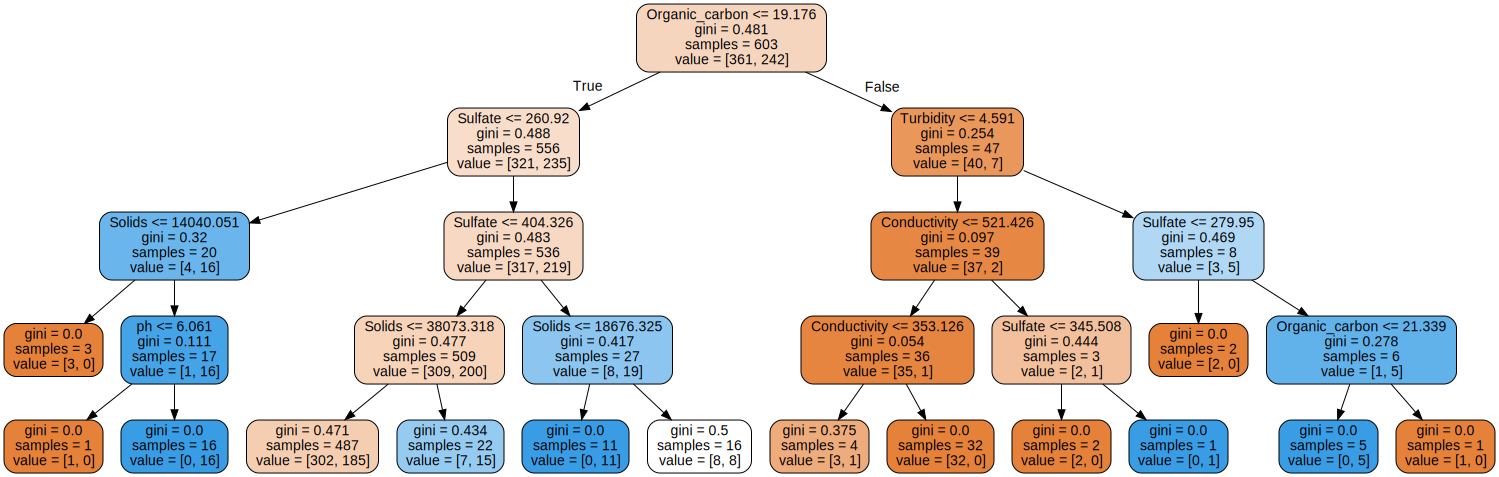

In [180]:
#Visualização gráfica da árvore de decisão
import os
from graphviz import Source
from sklearn.tree import export_graphviz

headers = ['ph',	'Hardness', 'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']

export_graphviz(modelo,
                out_file='AguaparaConsumo', #Arquivo para armazenamento do modelo gráfico
                feature_names=headers[0:9], #Nomes dos atributos
                rounded=True,
                filled=True
                )

#Uso do arquivo gerado para visualizar a árvore
Source.from_file('AguaparaConsumo')